In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex

plt.style.use('fivethirtyeight')
%matplotlib inline

In [24]:
full_df = pd.read_csv('country_vaccinations - country_vaccinations.csv')
full_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,Zimbabwe,ZWE,2021-02-26,12579.0,12579.0,NaN,1572.0,1750.0,0.08,0.08,NaN,118.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366851011...
4904,Zimbabwe,ZWE,2021-02-27,15705.0,15705.0,NaN,3126.0,2150.0,0.11,0.11,NaN,145.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366851011...
4905,Zimbabwe,ZWE,2021-02-28,18843.0,18843.0,NaN,3138.0,2551.0,0.13,0.13,NaN,172.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366851011...
4906,Zimbabwe,ZWE,2021-03-01,21456.0,21456.0,NaN,2613.0,2877.0,0.14,0.14,NaN,194.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366851011...


In [25]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              4908 non-null   object 
 1   iso_code                             4592 non-null   object 
 2   date                                 4908 non-null   object 
 3   total_vaccinations                   3193 non-null   float64
 4   people_vaccinated                    2718 non-null   float64
 5   people_fully_vaccinated              1845 non-null   float64
 6   daily_vaccinations_raw               2694 non-null   float64
 7   daily_vaccinations                   4748 non-null   float64
 8   total_vaccinations_per_hundred       3193 non-null   float64
 9   people_vaccinated_per_hundred        2718 non-null   float64
 10  people_fully_vaccinated_per_hundred  1845 non-null   float64
 11  daily_vaccinations_per_million

In [26]:
country_list = full_df.country.unique().tolist()
print(country_list)
full_df = full_df[full_df.country.apply(lambda x: x not in ['England', 
                            'Scotland', 'Wales', 'Northern Ireland'])]

['Albania', 'Algeria', 'Andorra', 'Anguilla', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Bermuda', 'Bolivia', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England', 'Estonia', 'Faeroe Islands', 'Falkland Islands', 'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Greenland', 'Guatemala', 'Guernsey', 'Guyana', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Myanmar', 'Nepal', 'Netherlands', 'New Zealand', 'Northern Cyprus', 'Northern Ireland'

In [27]:
daily = full_df.loc[:,['country', 'date', 'vaccines', 'daily_vaccinations']].dropna(subset=['daily_vaccinations'])
daily["date"] = pd.to_datetime(daily["date"], format = '%Y-%m-%d')

daily_agg = daily.groupby('country').daily_vaccinations.agg(
    sum_vaccination_amt  = 'sum',
    mean_vaccination_amt = 'mean')


full_daily = daily.merge(daily_agg, on = 'country')
full_daily

,country,date,vaccines,daily_vaccinations,sum_vaccination_amt,mean_vaccination_amt
0,Albania,2021-01-11,Pfizer/BioNTech,64.0,11326.0,257.409091
1,Albania,2021-01-12,Pfizer/BioNTech,64.0,11326.0,257.409091
2,Albania,2021-01-13,Pfizer/BioNTech,63.0,11326.0,257.409091
3,Albania,2021-01-14,Pfizer/BioNTech,66.0,11326.0,257.409091
4,Albania,2021-01-15,Pfizer/BioNTech,62.0,11326.0,257.409091
...,...,...,...,...,...,...
4431,Zimbabwe,2021-02-26,Sinopharm/Beijing,1750.0,17337.0,1444.750000
4432,Zimbabwe,2021-02-27,Sinopharm/Beijing,2150.0,17337.0,1444.750000
4433,Zimbabwe,2021-02-28,Sinopharm/Beijing,2551.0,17337.0,1444.750000
4434,Zimbabwe,2021-03-01,Sinopharm/Beijing,2877.0,17337.0,1444.750000


Text(0.5, 1.0, 'Top 10 countries vaccinations (sorted by mean values)')

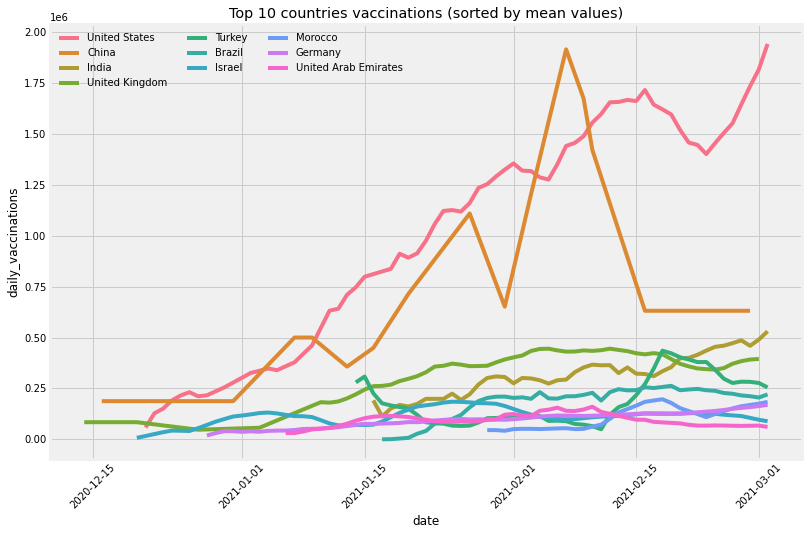

In [28]:
sort = daily_agg.sort_values(by = 'mean_vaccination_amt', ascending = False).reset_index()
countries = sort.country.to_list()

graphing_mean = full_daily.sort_values(by = 'mean_vaccination_amt', ascending = False)
top10_mean = graphing_mean[graphing_mean['country'].isin(countries[:10])]

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot()
sns.lineplot( x = 'date', y = 'daily_vaccinations', hue = 'country', 
    data = top10_mean)
plt.legend(ncol = 3, frameon = False, title = '')
plt.xticks(rotation=45) 
plt.title('Top 10 countries vaccinations (sorted by mean values)')

Text(0.5, 1.0, 'Top 10 countries vaccinations - total_vaccinations_per_hundred')

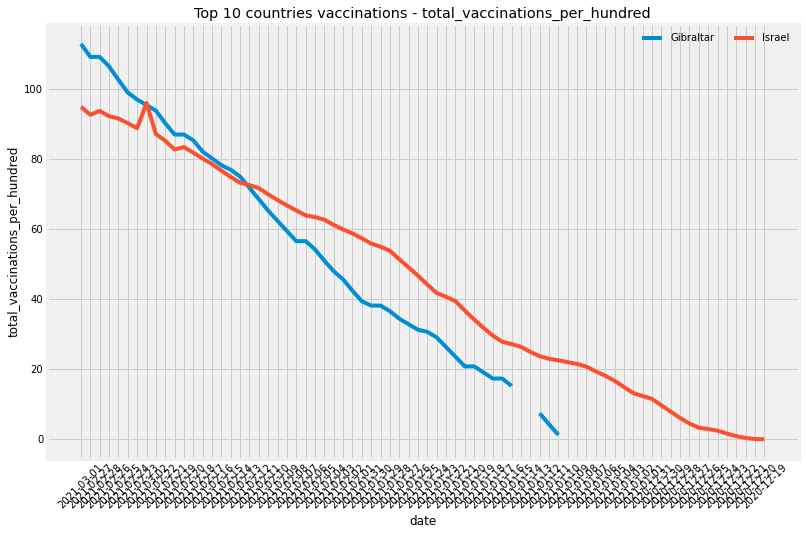

In [29]:
sort = full_df.sort_values(by = 'total_vaccinations_per_hundred', ascending = False).reset_index()
countries = sort.country.to_list()

graphing_mean = full_df.sort_values(by = 'total_vaccinations_per_hundred', ascending = False)
top10_mean = graphing_mean[graphing_mean['country'].isin(countries[:10])]

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot()
sns.lineplot( x = 'date', y = 'total_vaccinations_per_hundred', hue = 'country', 
    data = top10_mean)
plt.legend(ncol = 3, frameon = False, title = '')
plt.xticks(rotation=45) 
plt.title('Top 10 countries vaccinations - total_vaccinations_per_hundred')

Text(0.5, 1.0, 'Top 10 countries vaccinations (sorted by total amount of vaccinations)')

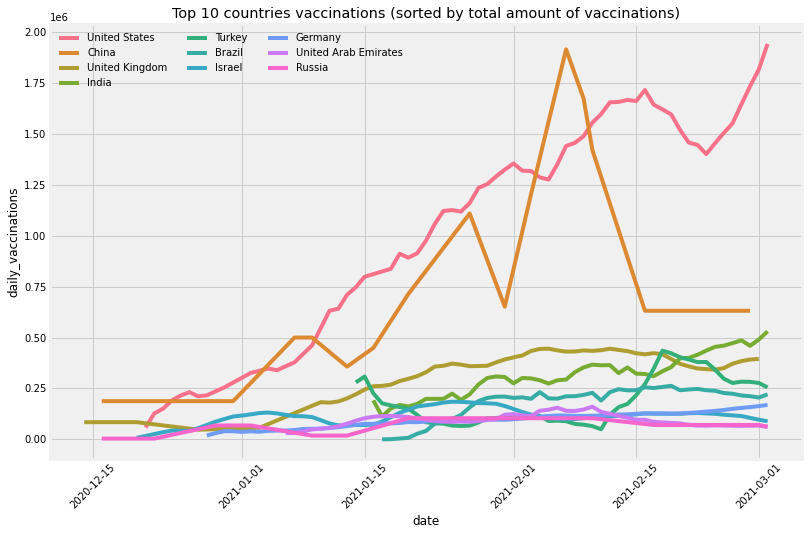

In [30]:
sort_sum = daily_agg.sort_values(by = 'sum_vaccination_amt', ascending = False).reset_index()
countries_sum = sort_sum.country.to_list()

graphing_sum = full_daily.sort_values(by = 'sum_vaccination_amt', ascending = False)
top10_sum = graphing_sum[graphing_sum['country'].isin(countries_sum[:10])]
top40_sum = graphing_sum[graphing_sum['country'].isin(countries_sum[:40])]

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot()
sns.lineplot( x = 'date', y = 'daily_vaccinations', hue = 'country', 
    data = top10_sum)
plt.legend(ncol = 3, frameon = False, title = '')
plt.xticks(rotation=45) 
plt.title('Top 10 countries vaccinations (sorted by total amount of vaccinations)')

Text(0.5, 1.0, 'Top 10 countries vaccinations (sorted by total amount of vaccinations per million)')

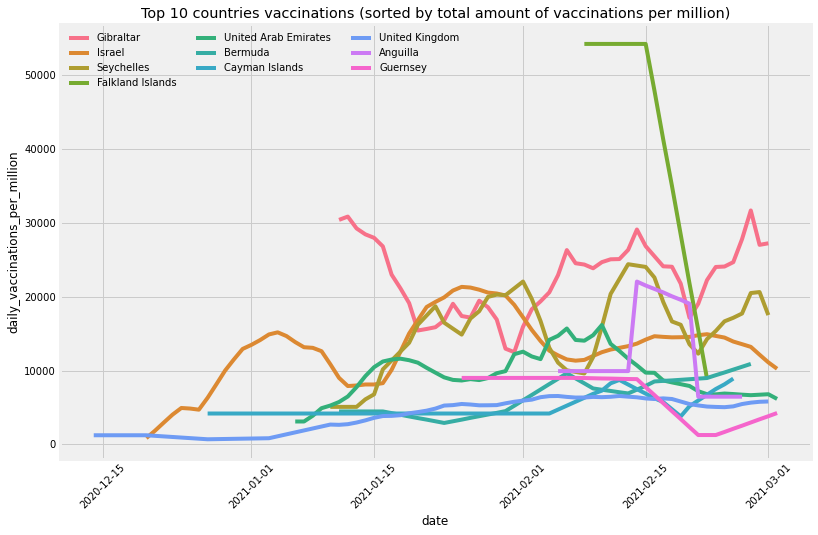

In [31]:
daily_mil = full_df.loc[:,['country', 'date', 
    'daily_vaccinations_per_million']].dropna(subset=['daily_vaccinations_per_million'])
daily_mil["date"] = pd.to_datetime(daily_mil["date"], format = '%Y-%m-%d')

daily_agg_mil = daily_mil.groupby('country').daily_vaccinations_per_million.agg(
    sum_vaccination_amt  = 'sum',
    mean_vaccination_amt = 'mean')

full_daily_mil = daily_mil.merge(daily_agg_mil, on = 'country')


sorted_sum = daily_agg_mil.sort_values(by = 'sum_vaccination_amt', ascending = False).reset_index()
countries_sum_mil = sorted_sum.country.to_list()

graphing_sum_mil = full_daily_mil.sort_values(by = 'sum_vaccination_amt', ascending = False)
top10_sum_mil = graphing_sum_mil[graphing_sum_mil['country'].isin(countries_sum_mil[:10])]
top40_sum_mil = graphing_sum_mil[graphing_sum_mil['country'].isin(countries_sum_mil[:40])]

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot()
sns.lineplot( x = 'date', y = 'daily_vaccinations_per_million', hue = 'country', 
    data = top10_sum_mil)
plt.legend(ncol = 3, frameon = False, title = '')
plt.xticks(rotation=45) 
plt.title('Top 10 countries vaccinations (sorted by total amount of vaccinations per million)')

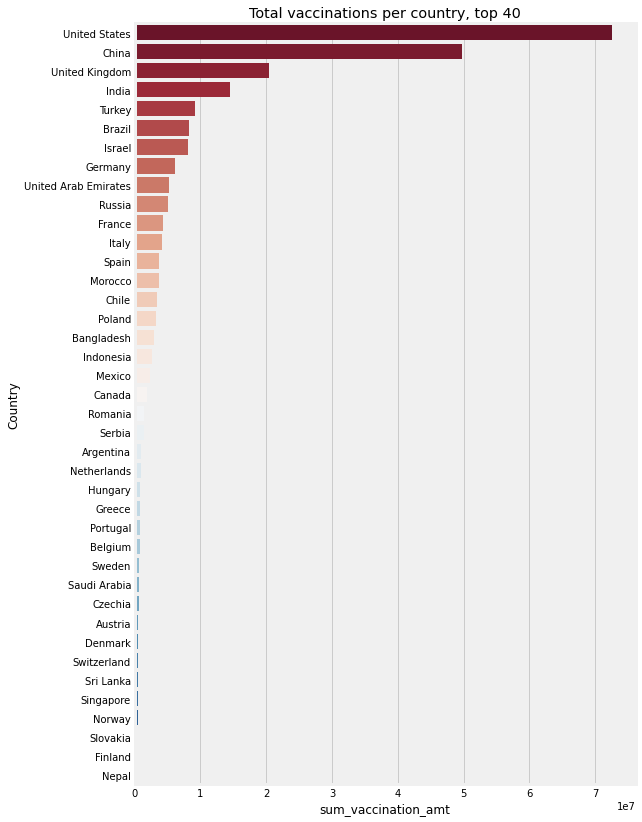

In [32]:
plt.figure(figsize=(8,14))
sns.barplot(x=top40_sum['sum_vaccination_amt'], y=top40_sum['country'], palette="RdBu")
plt.xlabel("sum_vaccination_amt")
plt.ylabel("Country")
plt.title("Total vaccinations per country, top 40")
plt.show()

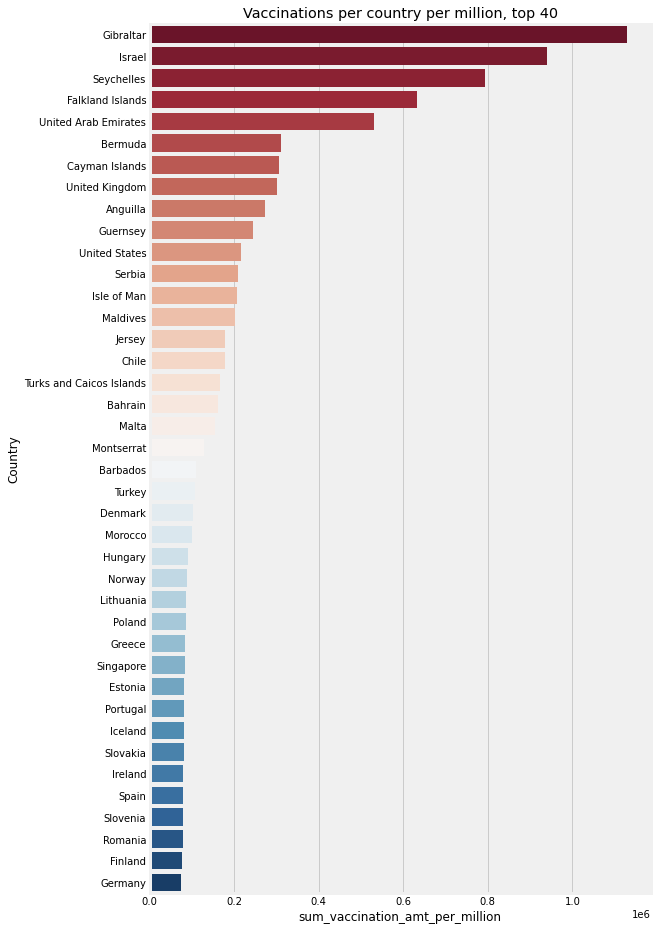

In [33]:
plt.figure(figsize=(8,16))
sns.barplot(x=top40_sum_mil['sum_vaccination_amt'], y=top40_sum_mil['country'], palette="RdBu")
plt.xlabel("sum_vaccination_amt_per_million")
plt.ylabel("Country")
plt.title("Vaccinations per country per million, top 40")
plt.show()

In [34]:
data = full_daily.groupby('vaccines')['sum_vaccination_amt'].sum()
data = pd.DataFrame(data).reset_index()
data = data.sort_values(by = 'sum_vaccination_amt', ascending = False).reset_index()

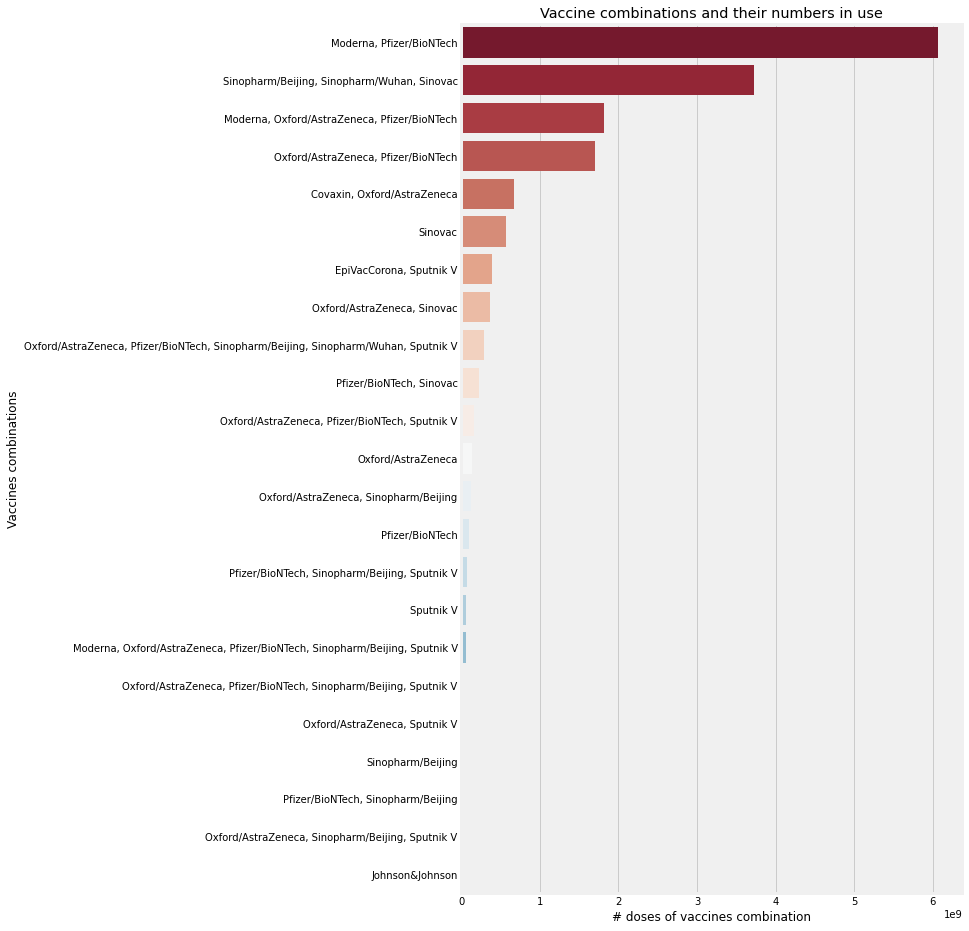

In [35]:
plt.figure(figsize=(8,16))
sns.barplot(x=data['sum_vaccination_amt'], y=data['vaccines'], palette="RdBu")
plt.xlabel("# doses of vaccines combination")
plt.ylabel("Vaccines combinations")
plt.title("Vaccine combinations and their numbers in use")
plt.show()

In [36]:
vaccines = full_daily.loc[:,['country', 'vaccines']]
vaccines = vaccines.groupby('vaccines')['country'].unique()
vaccines = pd.DataFrame(vaccines).reset_index()
vaccines

,vaccines,country
0,"Covaxin, Oxford/AstraZeneca",[India]
1,"EpiVacCorona, Sputnik V",[Russia]
2,Johnson&Johnson,[South Africa]
3,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech","[Austria, Belgium, Bulgaria, Czechia, Estonia,..."
4,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",[Hungary]
5,"Moderna, Pfizer/BioNTech","[Canada, Denmark, Israel, Liechtenstein, Portu..."
6,Oxford/AstraZeneca,"[Anguilla, Bangladesh, Barbados, Dominican Rep..."
7,"Oxford/AstraZeneca, Pfizer/BioNTech","[Isle of Man, Jersey, Oman, Saudi Arabia, Slov..."
8,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",[United Arab Emirates]
9,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",[Bahrain]


In [37]:
d = {}
for i in vaccines["vaccines"].unique():
    d[i] = [vaccines["country"][j] for j in vaccines[vaccines["vaccines"]==i].index]
d

{'Covaxin, Oxford/AstraZeneca': [array(['India'], dtype=object)],
 'EpiVacCorona, Sputnik V': [array(['Russia'], dtype=object)],
 'Johnson&Johnson': [array(['South Africa'], dtype=object)],
 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech': [array(['Austria', 'Belgium', 'Bulgaria', 'Czechia', 'Estonia', 'Finland',
         'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy',
         'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands', 'Norway',
         'Poland', 'Romania', 'Spain'], dtype=object)],
 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V': [array(['Hungary'], dtype=object)],
 'Moderna, Pfizer/BioNTech': [array(['Canada', 'Denmark', 'Israel', 'Liechtenstein', 'Portugal',
         'Switzerland', 'United States'], dtype=object)],
 'Oxford/AstraZeneca': [array(['Anguilla', 'Bangladesh', 'Barbados', 'Dominican Republic',
         'El Salvador', 'Falkland Islands', 'Guyana', 'Maldives',
         'Mauritius', 'Mongolia', 'Montserrat', 'Myanmar', 'N

In [38]:
title = "Popular Vaccines"
data = full_daily
fig = ex.choropleth(data, 
            locations="country", 
            locationmode='country names',
            color="vaccines", 
            hover_name="country", 
                   )


fig.update_layout(title=title, 
            title_x=0.5,
            legend_orientation = 'h'
)
fig.show()